In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,StandardScaler
from xgboost import XGBRegressor



In [ ]:
# Load data (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('model.csv')
data_test = pd.read_csv('predictions.csv')




In [ ]:
data.head()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,436,9,532,0.462264,1.0,0.594427,7,7,1,0,...,0.136364,1.0,-0.180556,-0.25,-0.125,0.50,0.500,0.00,0.500,2200
1,185,16,1012,0.446247,1.0,0.638112,4,2,3,11,...,0.100000,0.9,-0.318981,-1.00,-0.050,0.05,-0.075,0.45,0.075,816
2,210,12,506,0.546559,1.0,0.693291,8,3,2,1,...,0.050000,0.5,-0.292708,-0.75,-0.100,0.00,0.000,0.50,0.000,1000
3,723,11,241,0.543933,1.0,0.648649,5,4,1,1,...,0.136364,0.7,0.000000,0.00,0.000,0.00,0.000,0.50,0.000,660
4,345,11,983,0.405930,1.0,0.594747,11,7,1,1,...,0.100000,1.0,-0.256481,-0.80,-0.050,0.00,0.000,0.50,0.000,1000


In [ ]:
data_test.head()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,90,16,963,0.361976,1.0,0.412722,4,3,60,1,...,0.335000,0.100000,1.0,-0.205806,-0.5,-0.071429,0.510859,0.296591,0.010859,0.296591
1,727,13,140,0.786765,1.0,0.935897,2,1,0,0,...,0.491667,0.100000,0.8,-0.400000,-0.6,-0.200000,0.800000,-0.600000,0.300000,0.600000
2,692,8,908,0.506201,1.0,0.689091,18,10,8,0,...,0.257464,0.033333,0.6,-0.396399,-1.0,-0.100000,0.625000,-0.375000,0.125000,0.375000
3,726,11,351,0.521490,1.0,0.658654,9,6,1,0,...,0.317045,0.100000,1.0,-0.382500,-0.5,-0.300000,0.700000,0.400000,0.200000,0.400000
4,508,5,1125,0.457246,1.0,0.645551,17,12,1,1,...,0.277132,0.033333,0.6,-0.318197,-1.0,-0.050000,0.000000,0.000000,0.500000,0.000000


## EDA and Pre - Processing


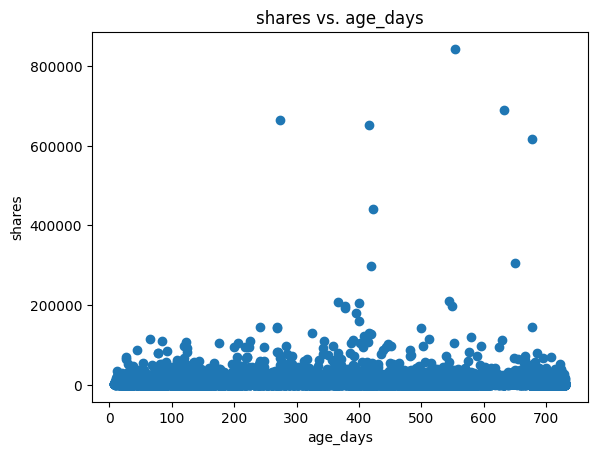

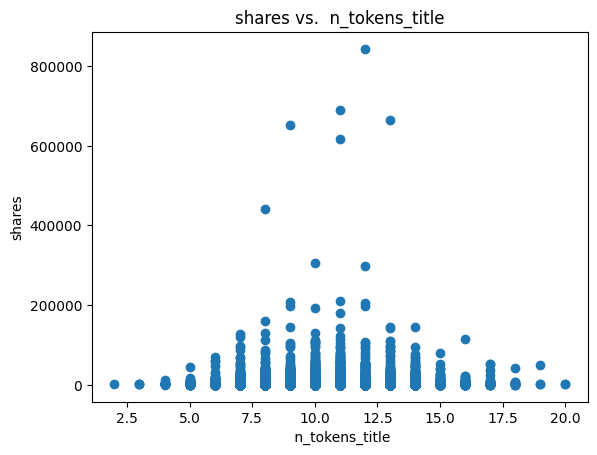

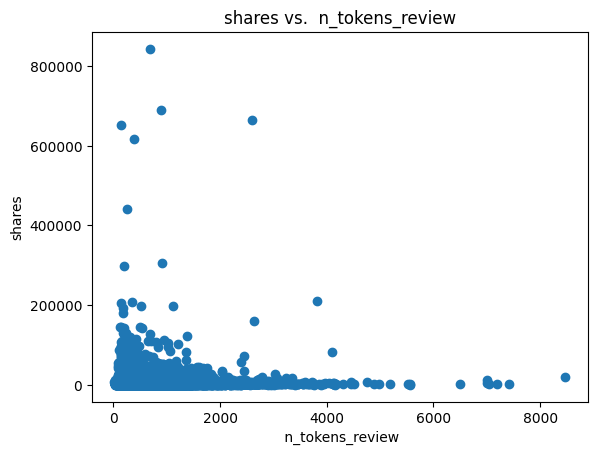

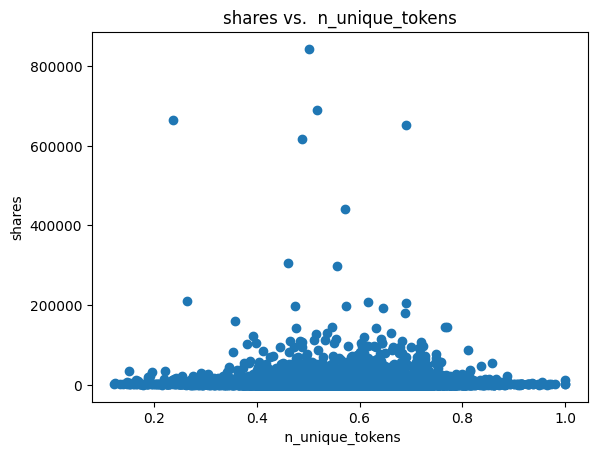

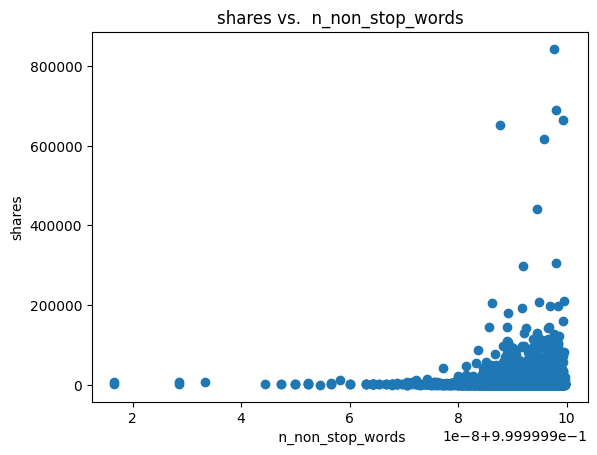

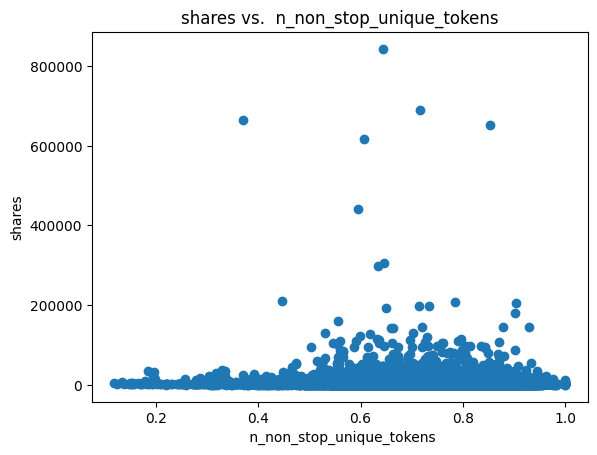

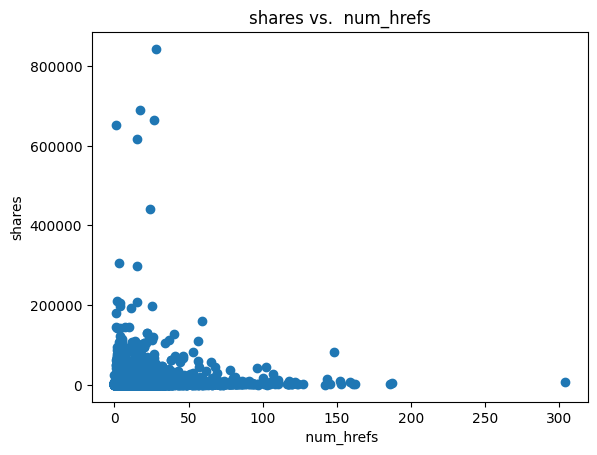

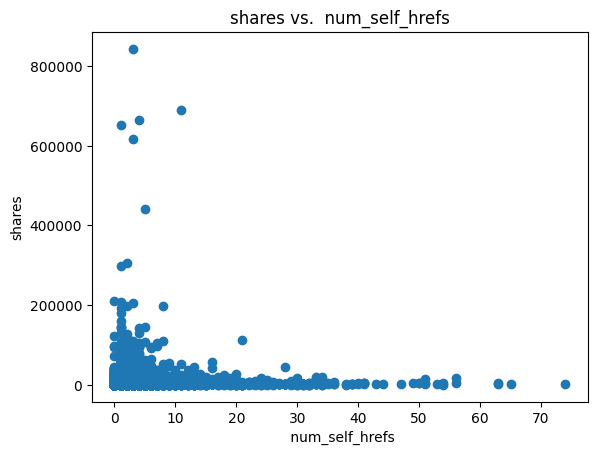

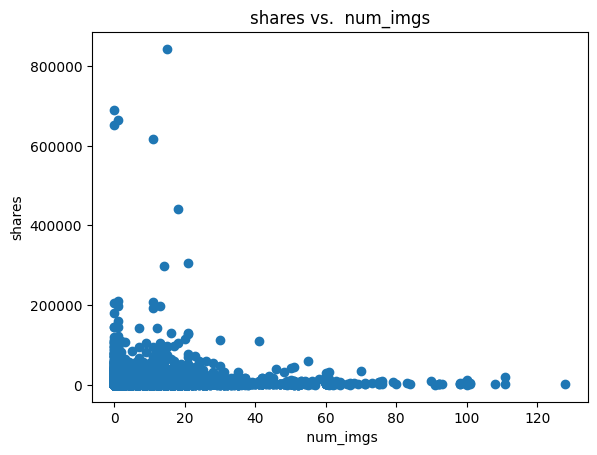

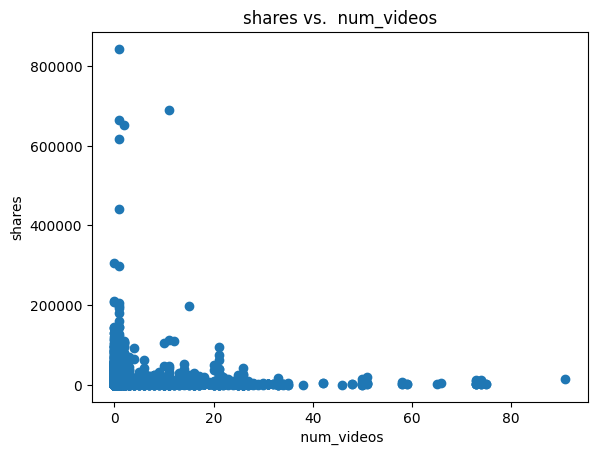

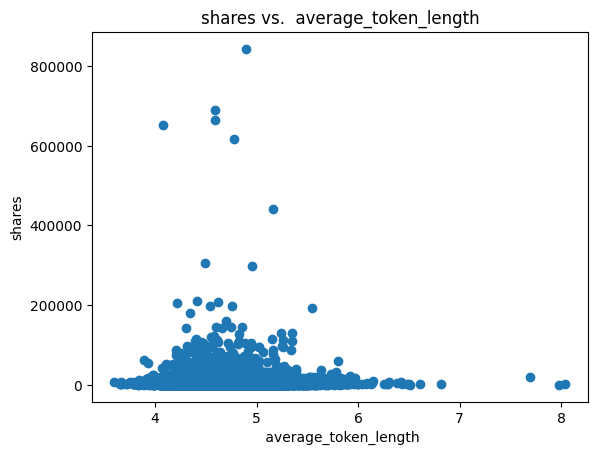

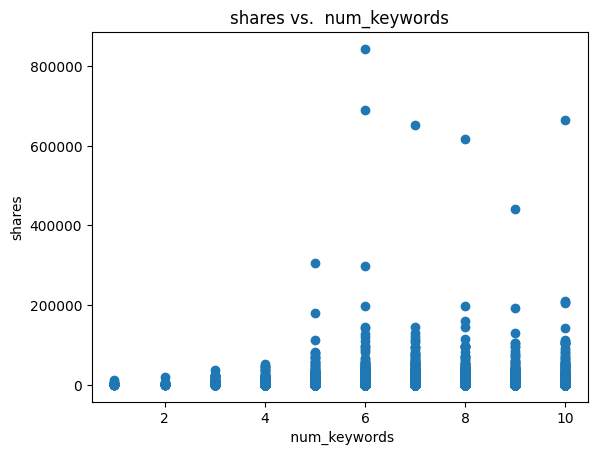

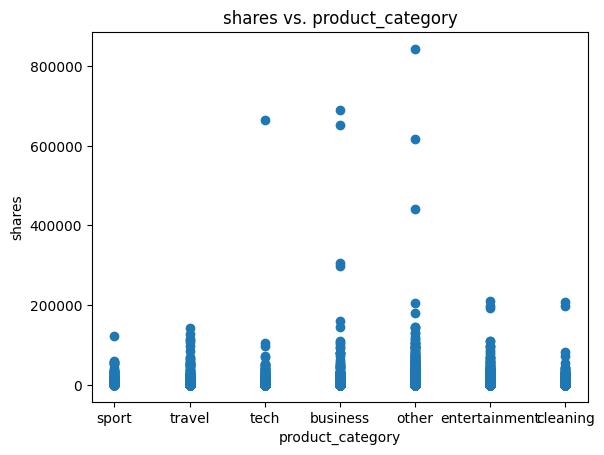

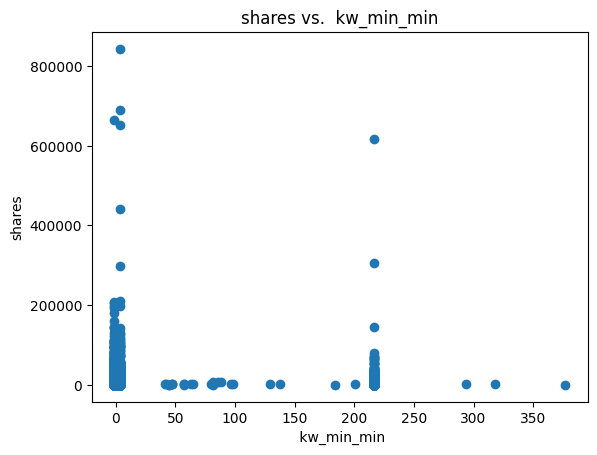

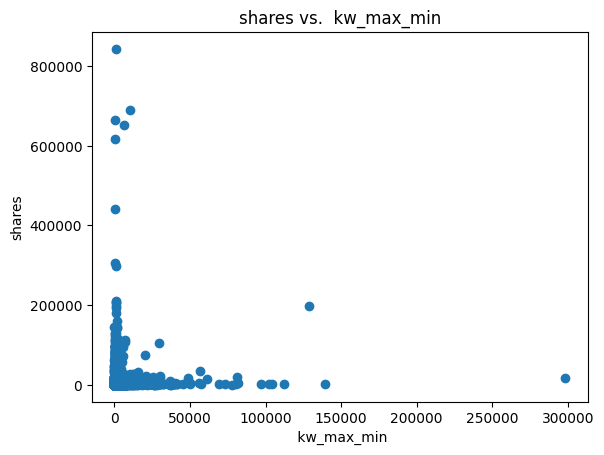

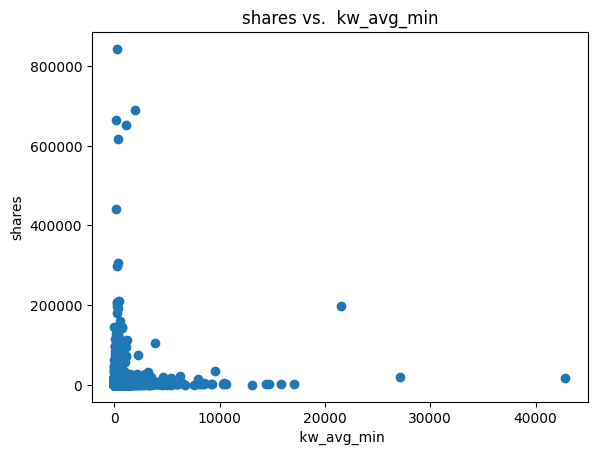

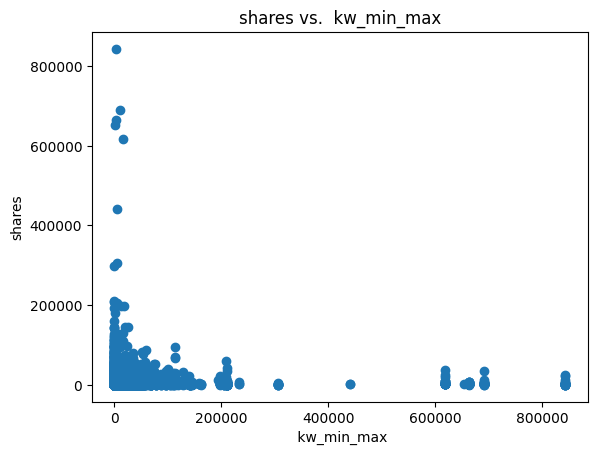

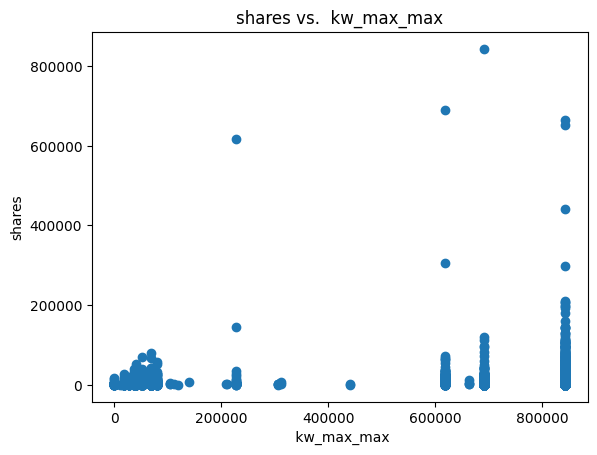

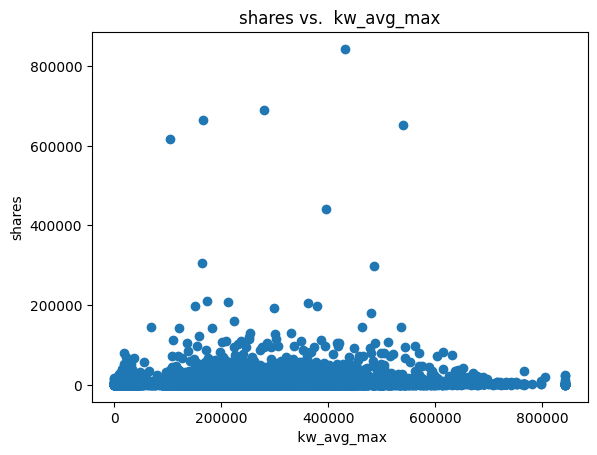

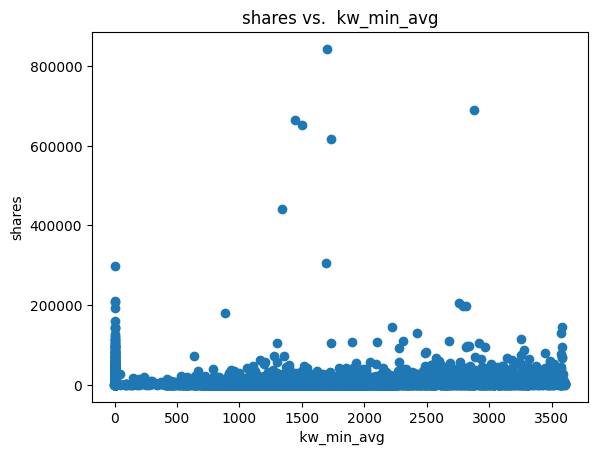

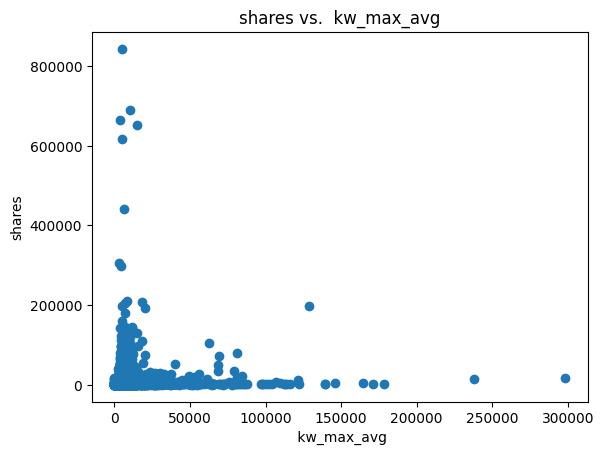

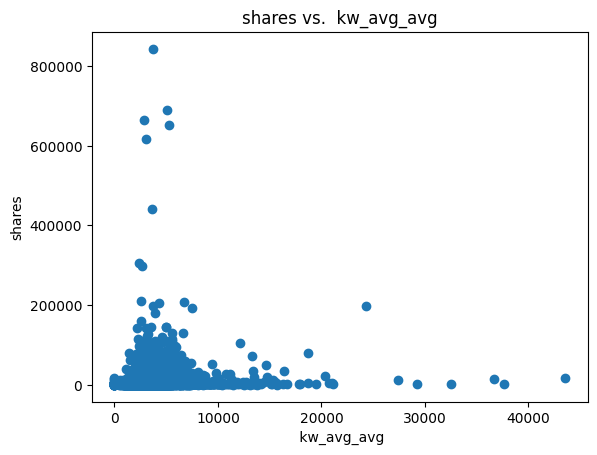

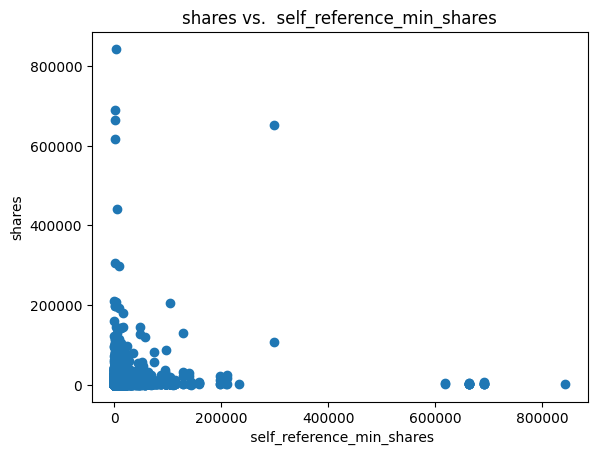

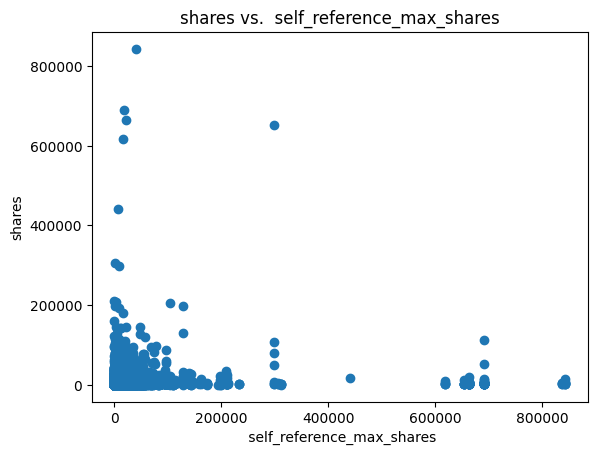

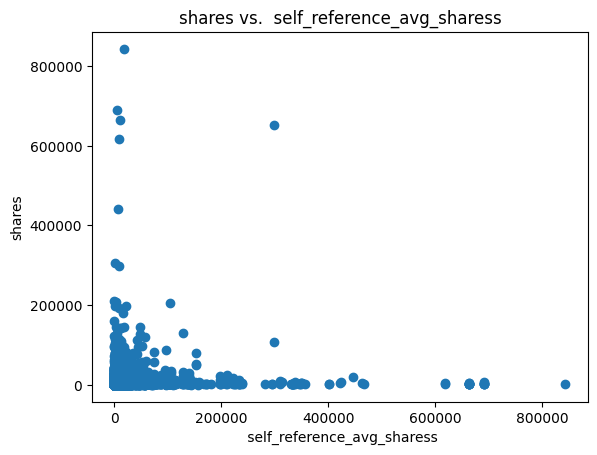

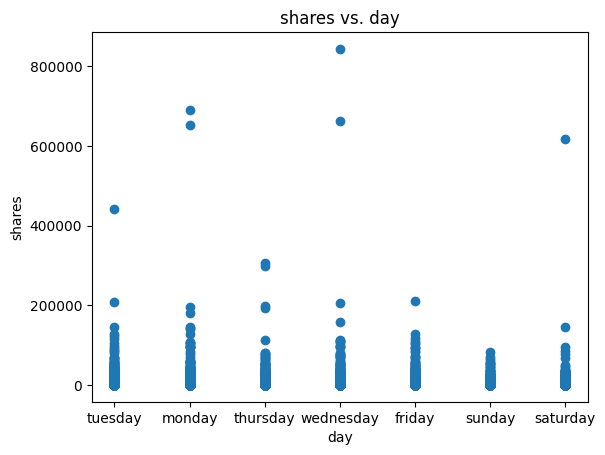

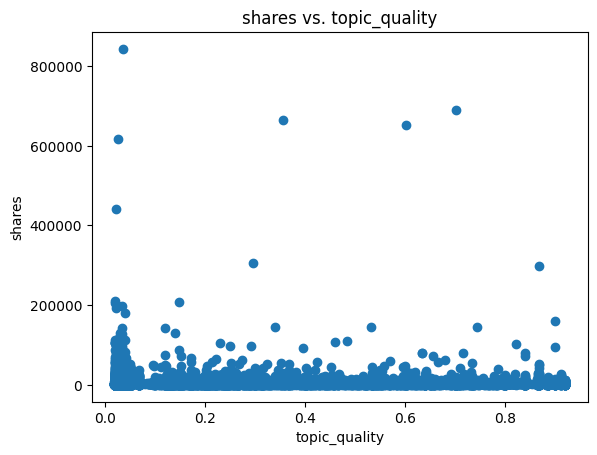

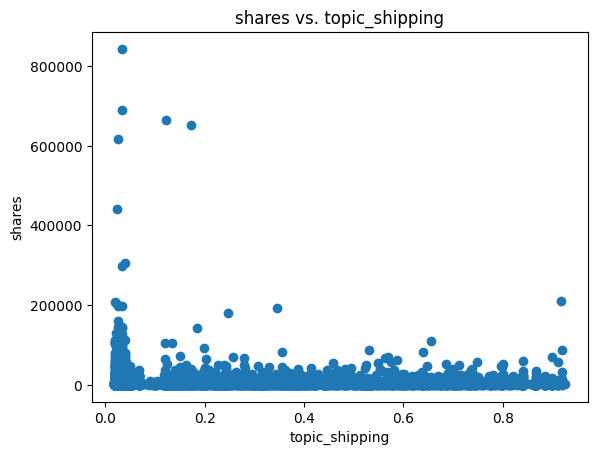

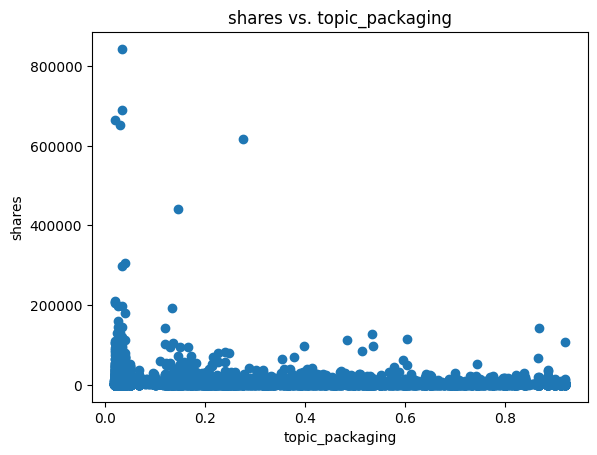

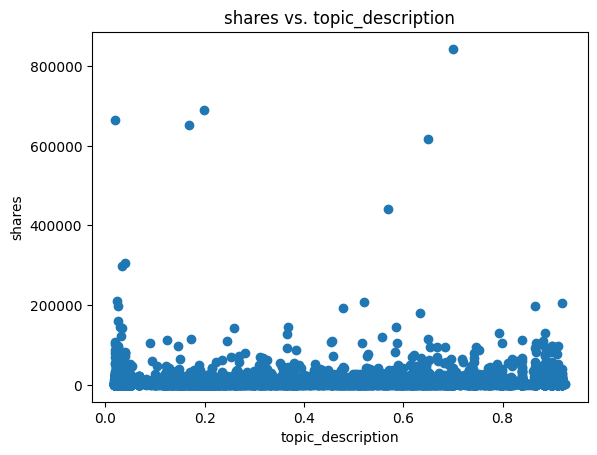

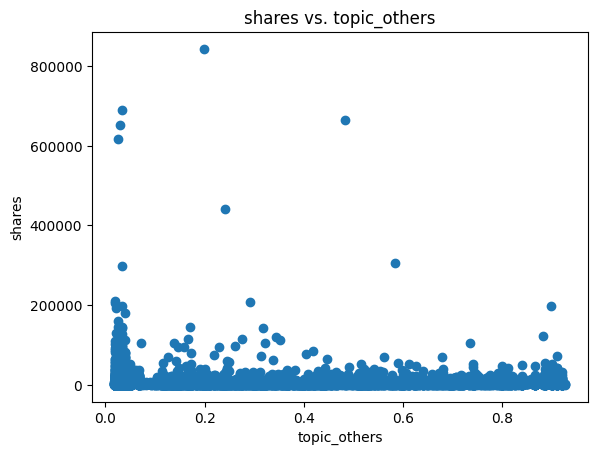

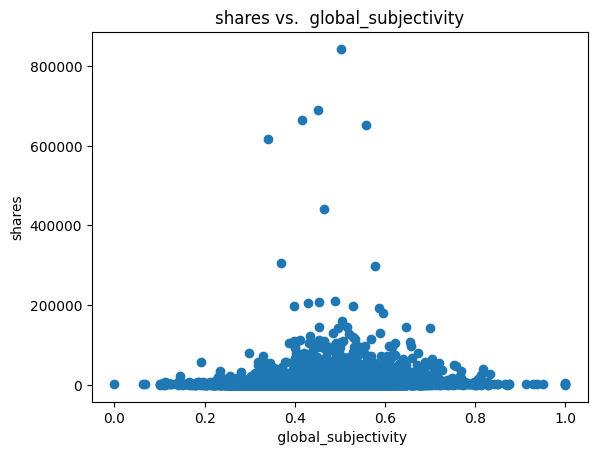

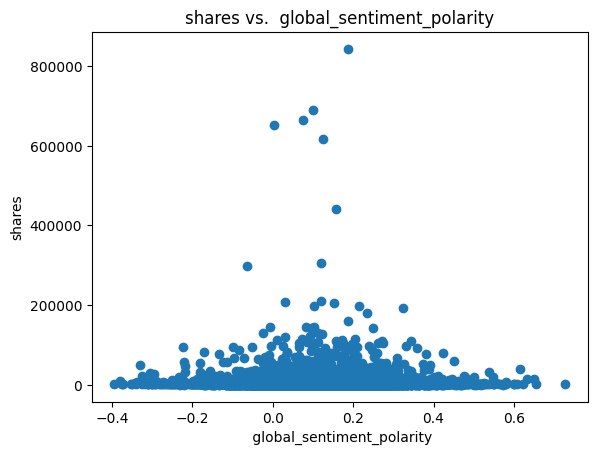

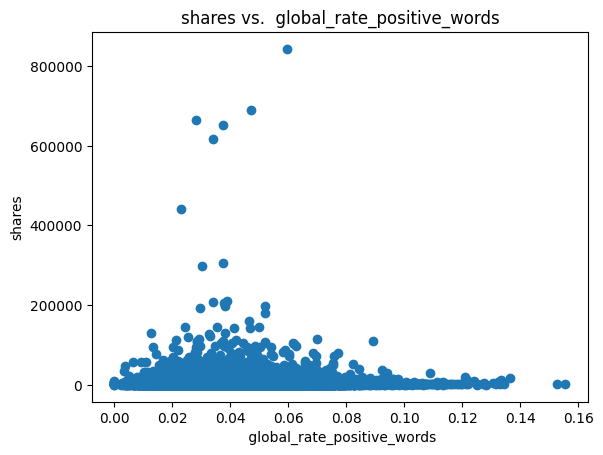

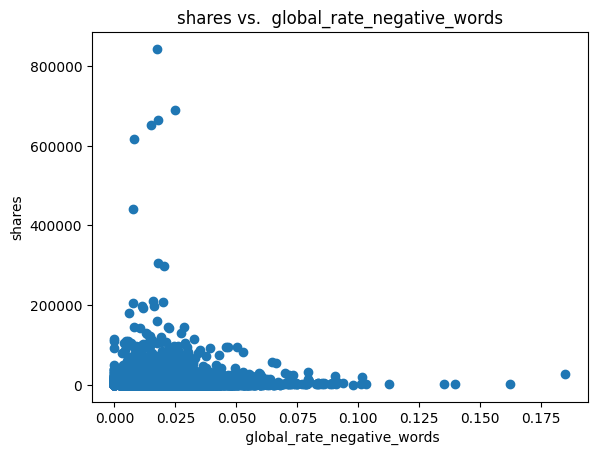

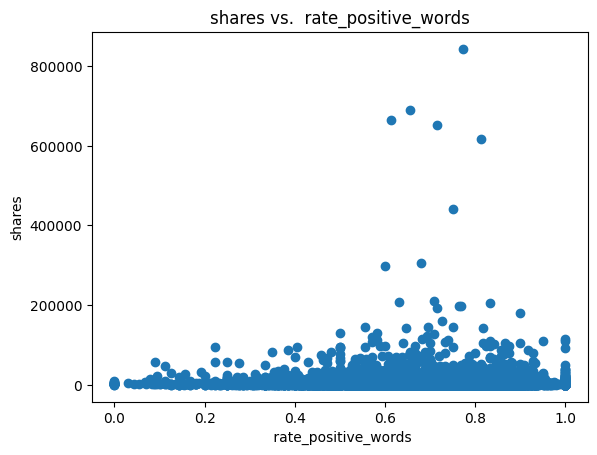

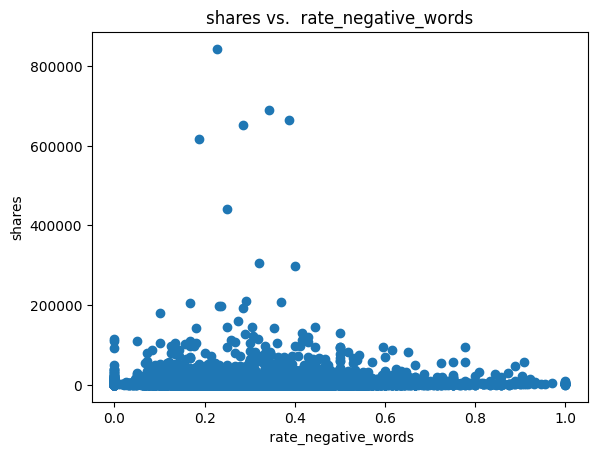

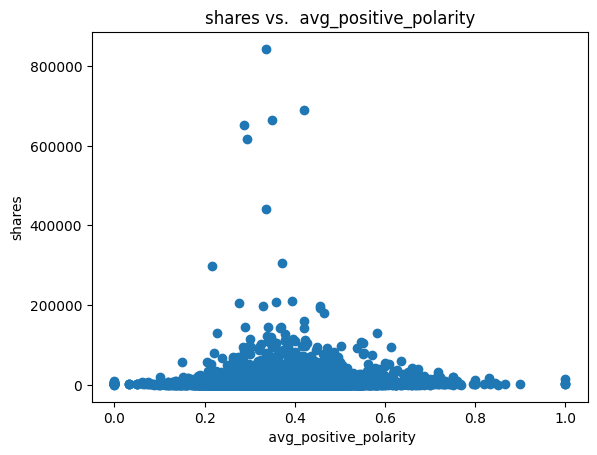

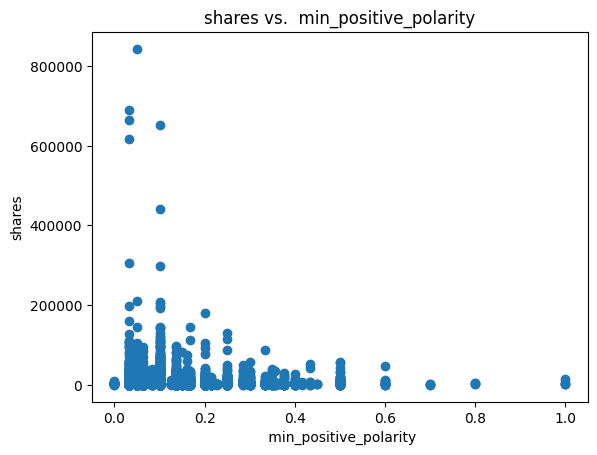

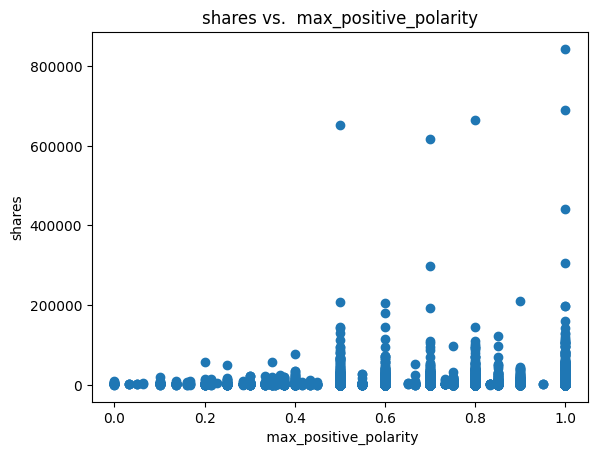

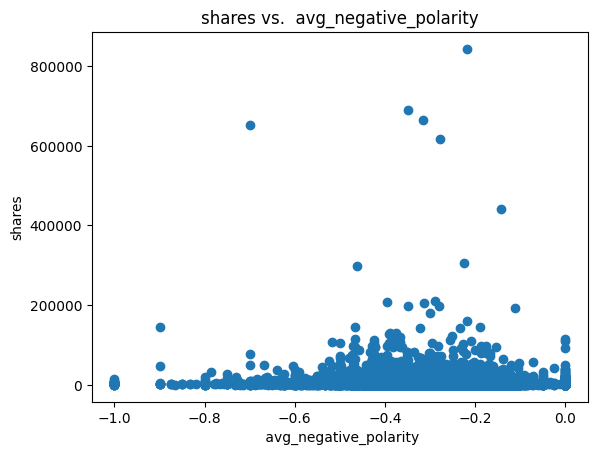

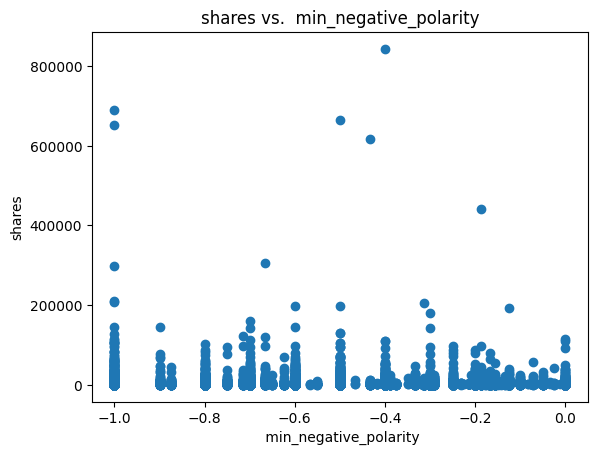

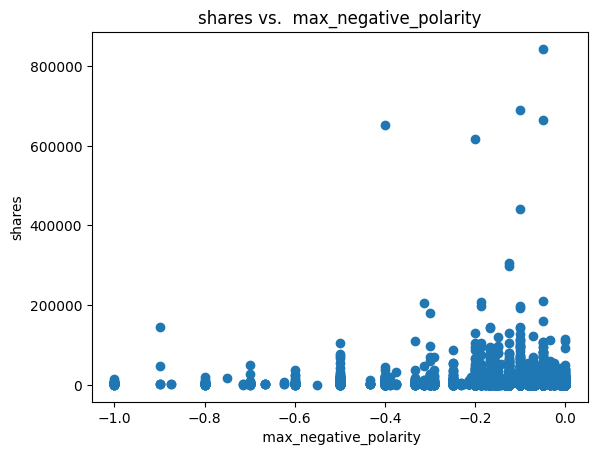

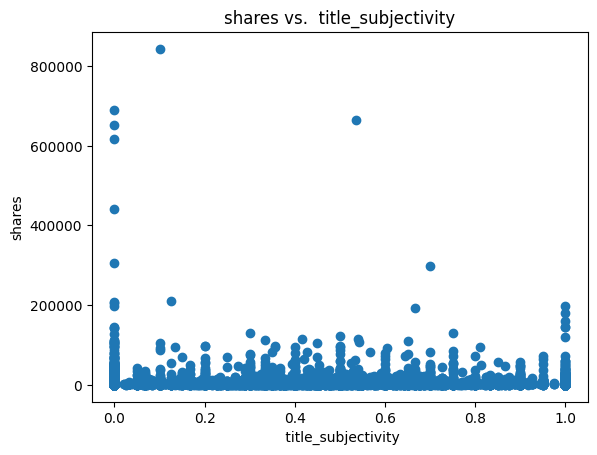

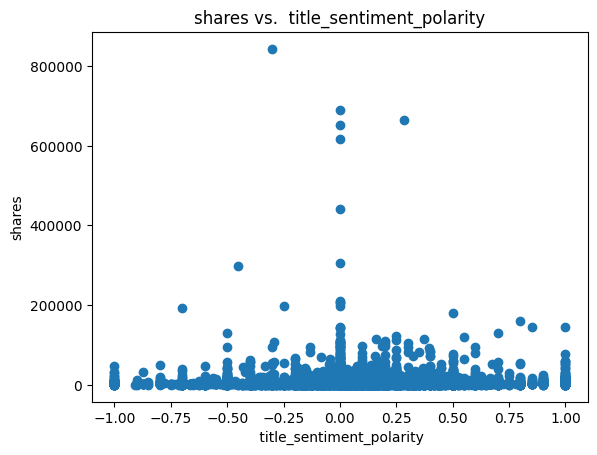

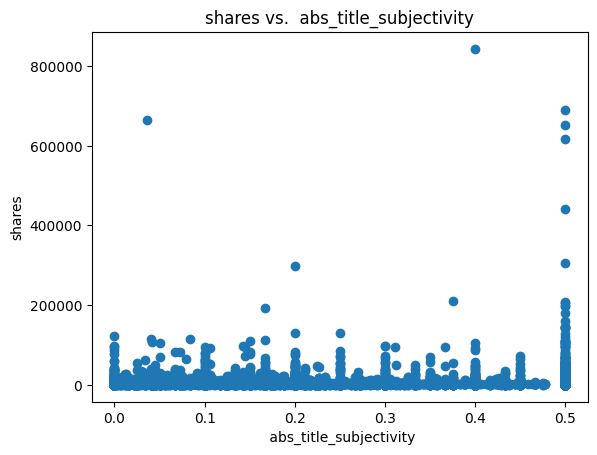

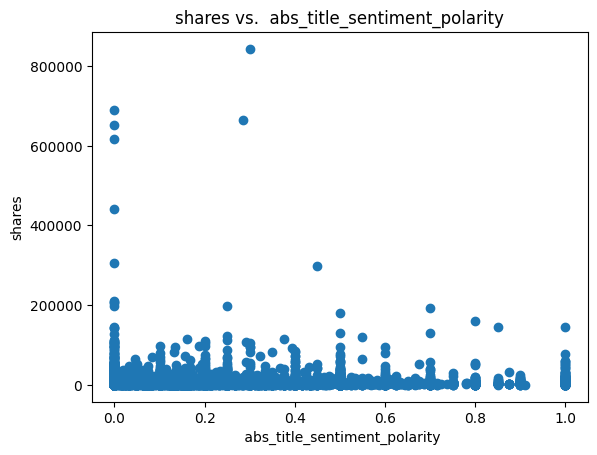

In [ ]:
#Exploratory data analysis (EDA)

#Scatter plots to visualize relationships between features and shares
for col in data.columns:
  if col != ' shares':  # Assuming 'shares' is your shares variable
    plt.scatter(data[col], data[' shares'])
    plt.xlabel(col)
    plt.ylabel('shares')
    plt.title(f'shares vs. {col}')
    plt.show()


# useless column deleted

In [ ]:
data.columns

Index(['age_days', ' n_tokens_title', ' n_tokens_review', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'product_category', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', 'day', 'topic_quality', 'topic_shipping',
       'topic_packaging', 'topic_description', 'topic_others',
       ' global_subjectivity', ' global_sentiment_polarity',
       ' global_rate_positive_words', ' global_rate_negative_words',
       ' rate_positive_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       

In [ ]:
columns_to_delete = [ ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg']  #column names to delete here

# Drop columns
data.drop(columns=columns_to_delete, inplace=True)

#descriptive value of each column

In [ ]:
data.describe()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,28000.000000,28000.000000,28000.000000,28000.000000,2.800000e+04,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000
mean,360.376286,10.379679,559.612036,0.547309,1.000000e+00,0.693451,11.229857,3.382214,4.558214,1.261143,...,0.098734,0.779888,-0.267296,-0.536794,-0.110911,0.280761,0.070664,0.342251,0.155292,3408.232750
std,212.558887,2.106580,464.024465,0.102457,4.052939e-09,0.101096,11.424556,3.812180,8.275950,4.214034,...,0.070214,0.212355,0.121056,0.279475,0.094832,0.323489,0.264927,0.188608,0.225972,12578.941208
min,8.000000,2.000000,18.000000,0.123422,9.999999e-01,0.119134,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,5.000000
25%,175.000000,9.000000,258.000000,0.477454,1.000000e+00,0.632627,5.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.331566,-0.714286,-0.125000,0.000000,0.000000,0.166667,0.000000,942.000000
50%,348.000000,10.000000,420.000000,0.543549,1.000000e+00,0.693603,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.257407,-0.500000,-0.100000,0.125000,0.000000,0.500000,0.000000,1400.000000
75%,547.000000,12.000000,728.000000,0.611805,1.000000e+00,0.757404,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.193333,-0.312500,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000
max,731.000000,20.000000,8474.000000,1.000000,1.000000e+00,1.000000,304.000000,74.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


# checking missing data

In [ ]:
# Check for missing values
print(data.isnull().sum())
#data.dropna(inplace=True)

age_days                         0
 n_tokens_title                  0
 n_tokens_review                 0
 n_unique_tokens                 0
 n_non_stop_words                0
 n_non_stop_unique_tokens        0
 num_hrefs                       0
 num_self_hrefs                  0
 num_imgs                        0
 num_videos                      0
 average_token_length            0
 num_keywords                    0
product_category                 0
 self_reference_min_shares       0
 self_reference_max_shares       0
 self_reference_avg_sharess      0
day                              0
topic_quality                    0
topic_shipping                   0
topic_packaging                  0
topic_description                0
topic_others                     0
 global_subjectivity             0
 global_sentiment_polarity       0
 global_rate_positive_words      0
 global_rate_negative_words      0
 rate_positive_words             0
 rate_negative_words             0
 avg_positive_polari

# type of data

In [ ]:
#Verifying dtypes suitability with features
print(data.dtypes)

age_days                           int64
 n_tokens_title                    int64
 n_tokens_review                   int64
 n_unique_tokens                 float64
 n_non_stop_words                float64
 n_non_stop_unique_tokens        float64
 num_hrefs                         int64
 num_self_hrefs                    int64
 num_imgs                          int64
 num_videos                        int64
 average_token_length            float64
 num_keywords                      int64
product_category                  object
 self_reference_min_shares       float64
 self_reference_max_shares       float64
 self_reference_avg_sharess      float64
day                               object
topic_quality                    float64
topic_shipping                   float64
topic_packaging                  float64
topic_description                float64
topic_others                     float64
 global_subjectivity             float64
 global_sentiment_polarity       float64
 global_rate_pos

#IQR METHOD - TRYING TO ELIMINATE XTREME VALUES

In [ ]:
numerical_features = data.select_dtypes(include=np.number).columns

# Define function to remove outliers using IQR method
def remove_outliers(df, features, threshold=1.0):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Remove outliers
data = remove_outliers(data, numerical_features)

# Reset index after removing rows
data.reset_index(drop=True, inplace=True)

In [ ]:

# Check the shape of the data after removing outliers
print("Shape of data after removing outliers:", data.shape)

Shape of data after removing outliers: (1494, 39)


In [ ]:
data.columns

Index(['age_days', ' n_tokens_title', ' n_tokens_review', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', 'product_category', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess', 'day',
       'topic_quality', 'topic_shipping', 'topic_packaging',
       'topic_description', 'topic_others', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares'],
      dtype='objec

#FEATURE SELECTION- here we are selecting features, which are most likely corelating with the dependent variable(y)

In [ ]:
# Calculate correlation coefficients
correlation = data.corr()[' shares'].abs().sort_values(ascending=False)

#Select top correlated features (excluding the target label itself)
top_features = correlation[correlation >= 0.01].index.tolist()

<ipython-input-140-9e469c87a149>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()[' shares'].abs().sort_values(ascending=False)


In [ ]:
#len(top_features )

#most corelated features

In [ ]:
top_features  = [x for x in top_features  if x != ' shares']
top_features

['topic_packaging',
 'topic_others',
 ' self_reference_avg_sharess',
 ' self_reference_max_shares',
 ' self_reference_min_shares',
 ' num_self_hrefs',
 ' rate_positive_words',
 ' rate_negative_words',
 'age_days',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 'topic_quality',
 ' global_rate_negative_words',
 ' n_non_stop_words',
 ' average_token_length',
 ' n_tokens_title',
 ' global_subjectivity',
 ' avg_positive_polarity',
 ' title_subjectivity',
 ' min_positive_polarity',
 'topic_shipping',
 ' abs_title_subjectivity',
 ' max_negative_polarity',
 ' min_negative_polarity',
 ' num_hrefs',
 ' num_imgs',
 ' num_videos']

In [ ]:
data.describe()

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,1494.000000,1494.000000,1494.000000,1494.000000,1.494000e+03,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,...,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.000000,1494.0,1494.000000,1494.0,1494.000000
mean,356.840696,10.044177,519.396921,0.533694,1.000000e+00,0.699166,8.072959,2.251673,1.119813,0.222892,...,0.083504,0.740974,-0.231371,-0.472215,-0.094414,0.009204,0.0,0.492604,0.0,1265.016734
std,223.854102,1.997501,231.464926,0.061957,1.779904e-09,0.063409,4.194616,2.020884,0.605597,0.480551,...,0.032106,0.189561,0.066010,0.193384,0.038971,0.052791,0.0,0.031756,0.0,617.773968
min,8.000000,6.000000,155.000000,0.370797,1.000000e+00,0.539007,0.000000,0.000000,0.000000,0.000000,...,0.033333,0.300000,-0.406250,-0.900000,-0.200000,0.000000,0.0,0.250000,0.0,64.000000
25%,148.000000,9.000000,334.000000,0.486550,1.000000e+00,0.653959,5.000000,0.000000,1.000000,0.000000,...,0.050000,0.600000,-0.274715,-0.600000,-0.125000,0.000000,0.0,0.500000,0.0,823.000000
50%,345.500000,10.000000,475.500000,0.530804,1.000000e+00,0.697842,8.000000,2.000000,1.000000,0.000000,...,0.100000,0.750000,-0.226848,-0.500000,-0.100000,0.000000,0.0,0.500000,0.0,1100.000000
75%,564.000000,11.000000,651.000000,0.577839,1.000000e+00,0.744793,10.750000,4.000000,1.000000,0.000000,...,0.100000,1.000000,-0.185243,-0.300000,-0.050000,0.000000,0.0,0.500000,0.0,1600.000000
max,731.000000,15.000000,1197.000000,0.729032,1.000000e+00,0.850000,23.000000,7.000000,3.000000,2.000000,...,0.150000,1.000000,-0.087500,-0.100000,-0.008333,0.800000,0.0,0.500000,0.0,3100.000000


#seperating values for x and y

In [ ]:
X = data[top_features]
#X = data.drop(columns=[' shares'])
y = data[' shares']

In [ ]:


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)



In [ ]:
# Check data types and identify categorical features
categorical_features = [col for col in X_train.columns if data[col].dtype == 'object' ]

# Separate numerical and categorical features
numerical_features = [col for col in X_train.columns if col not in categorical_features]

#segrigation of features into categorical and numerical in order to perform one hot encoding and standard scaling resp.

In [ ]:
categorical_features

[]

In [ ]:
numerical_features

['topic_packaging',
 'topic_others',
 ' self_reference_avg_sharess',
 ' self_reference_max_shares',
 ' self_reference_min_shares',
 ' num_self_hrefs',
 ' rate_positive_words',
 ' rate_negative_words',
 'age_days',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 'topic_quality',
 ' global_rate_negative_words',
 ' n_non_stop_words',
 ' average_token_length',
 ' n_tokens_title',
 ' global_subjectivity',
 ' avg_positive_polarity',
 ' title_subjectivity',
 ' min_positive_polarity',
 'topic_shipping',
 ' abs_title_subjectivity',
 ' max_negative_polarity',
 ' min_negative_polarity',
 ' num_hrefs',
 ' num_imgs',
 ' num_videos']

In [ ]:
# Feature scaling for numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


In [ ]:

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# combining after pre processing

In [ ]:
X_train_processed = np.concatenate((X_train[numerical_features].values, X_train_encoded), axis=1)
X_test_processed = np.concatenate((X_test[numerical_features].values, X_test_encoded), axis=1)

#XGB Regressor - algorithm

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 1000],
    'learning_rate': [0.1],
    'max_depth': [3],
    'gamma': [0, 0.1],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0, 0.1]
}

model = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv=3, verbose=1,scoring='neg_mean_squared_error')
grid_search.fit(X_train_processed, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.1}


#data fitted in the model

In [ ]:


# Train the final model using the best hyperparameters
best_model = XGBRegressor(objective='reg:squarederror', **best_params, random_state=42)
best_model.fit(X_train_processed, y_train)

# Make predictions
y_pred = best_model.predict(X_test_processed)

In [ ]:
# Evaluate the model performance
val_mae = mean_absolute_error(y_test, y_pred)
print(f" MAE: {val_mae:.2f}")

 MAE: 489.19


#test run

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

MAE: 489.19
R^2 Score: 0.08


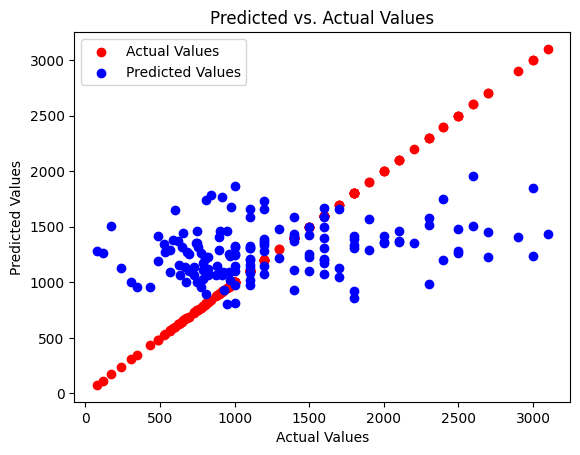

In [ ]:

# Plot y_test with red color
plt.scatter(y_test, y_test, color='red', label='Actual Values')

# Plot y_pred with blue color
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

Getting Y values for predictions.csv

In [ ]:
y_predfinal = best_model.predict(X_test_processed)

# Store predictions in a DataFrame
predictions_df = pd.DataFrame({'target': y_predfinal})

# Save predictions to a CSV file
predictions_df.to_csv('Predictions.csv', index=False)

In [ ]:
predictions_df.describe

<bound method NDFrame.describe of           target
0    1752.434692
1     809.266541
2    1280.998291
3    1409.936646
4    1461.340088
..           ...
145  1374.364624
146  1350.530273
147  1372.921875
148   971.822998
149  1114.963989

[150 rows x 1 columns]>